# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [4]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [5]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_pos = X_train[Y_train==1]
    X_train_neg = X_train[Y_train==-1]
    a = len(X_train_pos)/(len(X_train))
    mu_pos = np.sum(X_train_pos,axis=0)/(len(X_train_pos))
    mu_neg = np.sum(X_train_neg,axis=0)/(len(X_train_neg))
    w = mu_pos - mu_neg
    b = (0.5*((np.linalg.norm(mu_neg)**2)-(np.linalg.norm(mu_pos)**2))+np.log(a/(1-a)))
    Y_test_pred = np.dot(w,np.transpose(X_test))+b
    Y_test_pred[Y_test_pred>=0] = 1
    Y_test_pred[Y_test_pred<0] = -1
    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_pos = X_train[Y_train==1]
    X_train_neg = X_train[Y_train==-1]
    a = len(X_train_pos)/(len(X_train))
    mu_pos = np.sum(X_train_pos,axis=0)/(len(X_train_pos))
    mu_neg = np.sum(X_train_neg,axis=0)/(len(X_train_neg))
    w = mu_pos - mu_neg
    temp = X_train.copy()
    temp[Y_train==1] = temp[Y_train==1]-mu_pos
    temp[Y_train==-1] = temp[Y_train==-1]-mu_neg
    cov_mat = np.dot(temp.T,temp)/len(Y_train)
    inv = np.linalg.inv(cov_mat)
    b = (2*np.log(a/(1-a)) + np.matmul(np.transpose(mu_neg),np.matmul(inv,mu_neg))
    -np.matmul(np.transpose(mu_pos),np.matmul(inv,mu_pos)))
    Y_test_pred = b +2*np.matmul(w,np.matmul(inv,np.transpose(X_test)))
    Y_test_pred[Y_test_pred>=0] = 1
    Y_test_pred[Y_test_pred<0] = -1
    return Y_test_pred
    
def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_pos = X_train[Y_train==1]
    X_train_neg = X_train[Y_train==-1]
    a = len(X_train_pos)/(len(X_train_pos)+len(X_train_neg))
    mu_pos = np.sum(X_train_pos,axis=0)/(len(X_train_pos))
    mu_neg = np.sum(X_train_neg,axis=0)/(len(X_train_neg))
    cov_mat_pos = np.cov(np.transpose(X_train_pos),bias = True)
    inv_pos = np.linalg.inv(cov_mat_pos)
    cov_mat_neg = np.cov(np.transpose(X_train_neg),bias = True)
    inv_neg = np.linalg.inv(cov_mat_neg)
    b = (2*np.log((a*np.sqrt(np.linalg.det(inv_pos)))/((1-a)*(np.sqrt(np.linalg.det(inv_neg))))) 
         + np.matmul(np.transpose(mu_neg),np.matmul(inv_neg,mu_neg))
    -np.matmul(np.transpose(mu_pos),np.matmul(inv_pos,mu_pos)))
    leng = len(X_test)
    Y_test_pred = np.zeros(leng)
    for i in range(leng):
            Y_test_pred[i] = (b +2*(np.matmul((np.matmul(mu_pos,inv_pos)-np.matmul(mu_neg,inv_neg)),X_test[i]))
                             +np.matmul(X_test[i],np.matmul((inv_neg-inv_pos),X_test[i])))
                
    Y_test_pred[Y_test_pred>=0] = 1
    Y_test_pred[Y_test_pred<0] = -1
    return Y_test_pred  
    

In [6]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


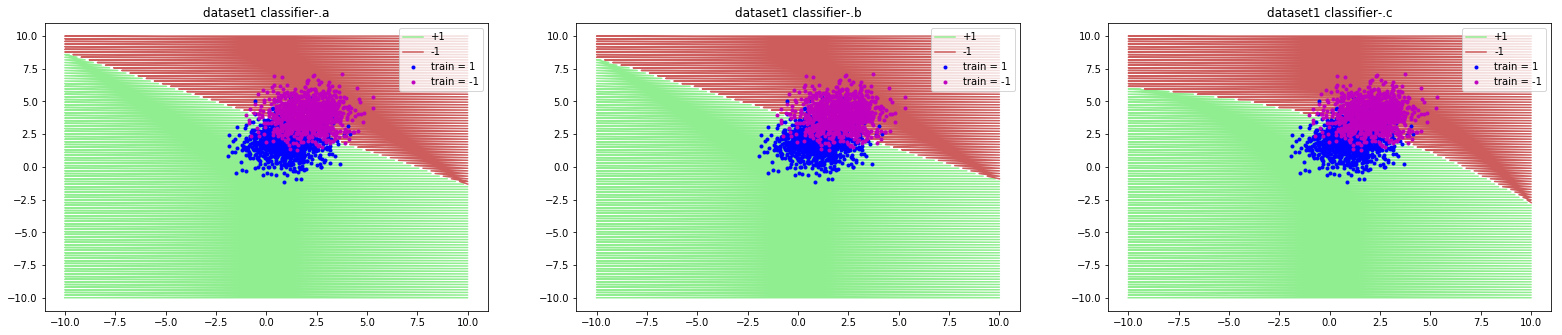

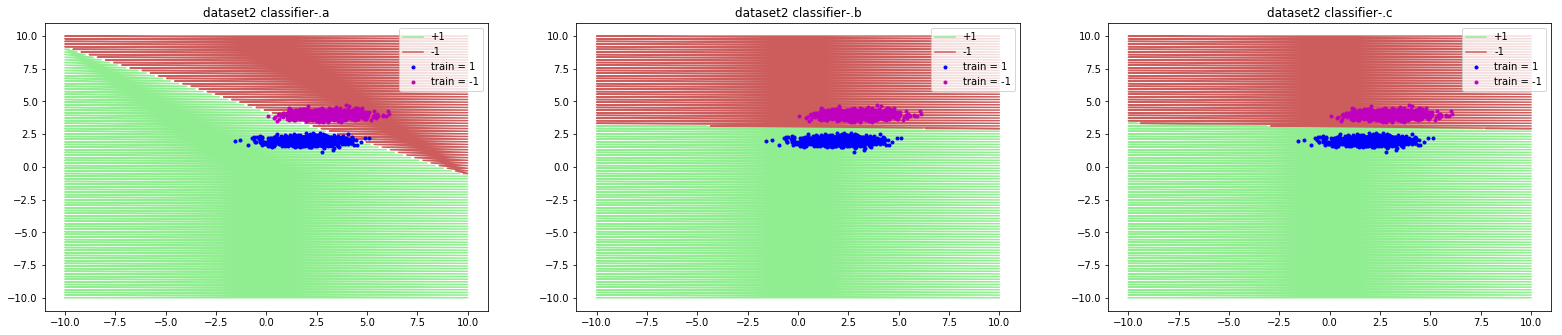

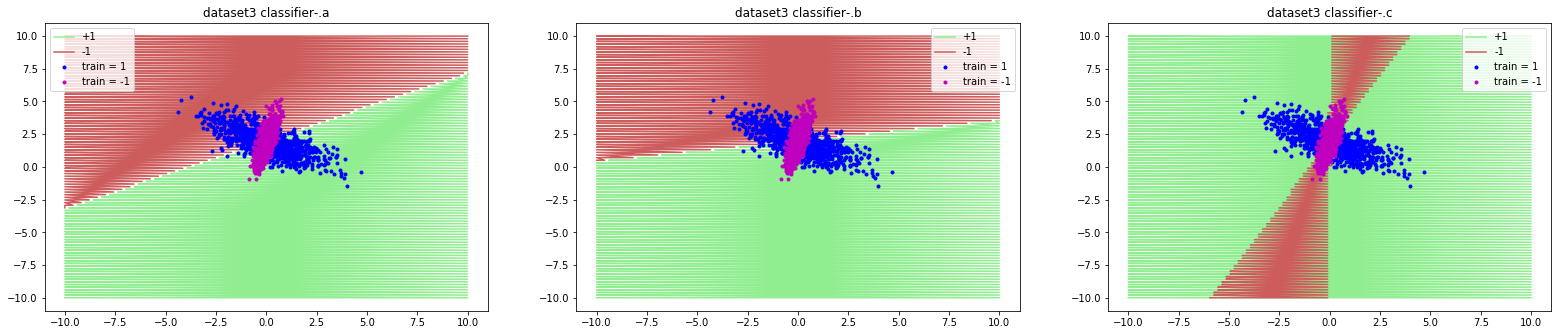

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
X_train1 = np.load('./Archive/dataset1_1.npz_FILES/arr_0.npy')
Y_train1 = np.load('./Archive/dataset1_1.npz_FILES/arr_1.npy')
X_test1  = np.load('./Archive/dataset1_1.npz_FILES/arr_2.npy')
Y_test1  = np.load('./Archive/dataset1_1.npz_FILES/arr_3.npy')
X_train2 = np.load('./Archive/dataset1_2.npz_FILES/arr_0.npy')
Y_train2 = np.load('./Archive/dataset1_2.npz_FILES/arr_1.npy')
X_test2  = np.load('./Archive/dataset1_2.npz_FILES/arr_2.npy')
Y_test2  = np.load('./Archive/dataset1_2.npz_FILES/arr_3.npy')
X_train3 = np.load('./Archive/dataset1_3.npz_FILES/arr_0.npy')
Y_train3 = np.load('./Archive/dataset1_3.npz_FILES/arr_1.npy')
X_test3  = np.load('./Archive/dataset1_3.npz_FILES/arr_2.npy')
Y_test3  = np.load('./Archive/dataset1_3.npz_FILES/arr_3.npy')

Y_pred_test_1a_1 = Bayes1a(X_train1, Y_train1, X_test1)
Y_pred_test_1b_1 = Bayes1b(X_train1, Y_train1, X_test1)
Y_pred_test_1c_1 = Bayes1c(X_train1, Y_train1, X_test1)

Y_pred_test_1a_2 = Bayes1a(X_train2, Y_train2, X_test2)
Y_pred_test_1b_2 = Bayes1b(X_train2, Y_train2, X_test2)
Y_pred_test_1c_2 = Bayes1c(X_train2, Y_train2, X_test2)

Y_pred_test_1a_3 = Bayes1a(X_train3, Y_train3, X_test3)
Y_pred_test_1b_3 = Bayes1b(X_train3, Y_train3, X_test3)
Y_pred_test_1c_3 = Bayes1c(X_train3, Y_train3, X_test3)

error = np.ndarray(shape=(3,3))
error[0][0] = len(np.where(Y_pred_test_1a_1 != Y_test1)[0])/(len(Y_test1))
error[0][1] = len(np.where(Y_pred_test_1b_1 != Y_test1)[0])/(len(Y_test1))
error[0][2] = len(np.where(Y_pred_test_1c_1 != Y_test1)[0])/(len(Y_test1))
error[1][0] = len(np.where(Y_pred_test_1a_2 != Y_test2)[0])/(len(Y_test2))
error[1][1] = len(np.where(Y_pred_test_1b_2 != Y_test2)[0])/(len(Y_test2))
error[1][2] = len(np.where(Y_pred_test_1c_2 != Y_test2)[0])/(len(Y_test2))
error[2][0] = len(np.where(Y_pred_test_1a_3 != Y_test3)[0])/(len(Y_test3))
error[2][1] = len(np.where(Y_pred_test_1b_3 != Y_test3)[0])/(len(Y_test3))
error[2][2] = len(np.where(Y_pred_test_1c_3 != Y_test3)[0])/(len(Y_test3))
# print(error)

def fun(x,z,i,cl):
    plt.plot(x[z==1].T[0],x[z==1].T[1],c='#90EE90')
    plt.plot(x[z==-1].T[0],x[z==-1].T[1],c='#CD5C5C')
    if(i==1):
        plt.plot(X_train1[Y_train1==1].T[0],X_train1[Y_train1==1].T[1],'b.')
        plt.plot(X_train1[Y_train1==-1].T[0],X_train1[Y_train1==-1].T[1],'m.')
        plt.title('dataset1 ' + 'classifier-.{}'.format(cl))
    elif(i==2):
        plt.plot(X_train2[Y_train2==1].T[0],X_train2[Y_train2==1].T[1],'b.')
        plt.plot(X_train2[Y_train2==-1].T[0],X_train2[Y_train2==-1].T[1],'m.')
        plt.title('dataset2 ' + 'classifier-.{}'.format(cl))
    elif(i==3):
        plt.plot(X_train3[Y_train3==1].T[0],X_train3[Y_train3==1].T[1],'b.')
        plt.plot(X_train3[Y_train3==-1].T[0],X_train3[Y_train3==-1].T[1],'m.')
        plt.title('dataset3 ' + 'classifier-.{}'.format(cl))
    plt.legend((('+1', '-1','train = 1 ','train = -1')))

    
n1 = 100
n2 = 100
x1 = np.linspace(-10,10,n1)
x2 = np.linspace(-10,10,n2)
x1,x2 = np.meshgrid(x1,x2)
x1 = x1.reshape((n1*n2,1))
x2 = x2.reshape((n1*n2,1))
x = np.concatenate((x1,x2),axis=1)
z1 = Bayes1a(X_train1,Y_train1,x)
z2 = Bayes1b(X_train1,Y_train1,x)
z3 = Bayes1c(X_train1,Y_train1,x)
plt.figure(figsize = (27,18))
plt.subplot(3,3,1)
fun(x,z1,1,'a')
plt.subplot(3,3,2)
fun(x,z2,1,'b')
plt.subplot(3,3,3)
fun(x,z3,1,'c')

z1 = Bayes1a(X_train2,Y_train2,x)
z2 = Bayes1b(X_train2,Y_train2,x)
z3 = Bayes1c(X_train2,Y_train2,x)
plt.figure(figsize = (27,18))
plt.subplot(3,3,4)
fun(x,z1,2,'a')
plt.subplot(3,3,5)
fun(x,z2,2,'b')
plt.subplot(3,3,6)
fun(x,z3,2,'c')

z1 = Bayes1a(X_train3,Y_train3,x)
z2 = Bayes1b(X_train3,Y_train3,x)
z3 = Bayes1c(X_train3,Y_train3,x)
plt.figure(figsize = (27,18))
plt.subplot(3,3,7)
fun(x,z1,3,'a')
plt.subplot(3,3,8)
fun(x,z2,3,'b')
plt.subplot(3,3,9)
fun(x,z3,3,'c')



** Cell type : TextWrite ** 
(Write your observations and table of errors here)

### Error matrix
| datasets | classifier_a | classifier_b | classifier_c |   |
|----------|--------------|--------------|--------------|---|
| dataset1 | 0.126        | 0.1245       | 0.1245       |   |
| dataset2 | 0.0085       | 0            | 0            |   |
| dataset3 | 0.497        | 0.495        | 0.135        |   |

### Observations

* classifier a, classifier b has linear boundary($w^{T}X+b$).Classifier c is nonlinear($X^{T}(\sum_{-}^{-1}-\sum_{+}^{-1})X+2(\mu_{+}^{T}\sum_{+}^{-1}-\mu_{-}^{T}\sum_{-1}^{-1})X+b$).
* classifier a has greater error rate in all three datasets which means assumption of identity covariance is not true everytime
* classifier c has low error rate since it takes difference unknown covariances.



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [8]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train1 = X_train[Y_train==1]
    X_train2 = X_train[Y_train==2]
    X_train3 = X_train[Y_train==3]
    X_train4 = X_train[Y_train==4]
    L = np.matrix([[0,1,2,3], [1,0,1,2],[2,1,0,1],[3,2,1,0]])
    a1 = len(X_train1)/(len(X_train))
    a2 = len(X_train2)/(len(X_train))
    a3 = len(X_train3)/(len(X_train))
    a4 = len(X_train4)/(len(X_train))
    mu1 = np.sum(X_train1,axis=0)/(len(X_train1))
    mu2 = np.sum(X_train2,axis=0)/(len(X_train2))
    mu3 = np.sum(X_train3,axis=0)/(len(X_train3))
    mu4 = np.sum(X_train4,axis=0)/(len(X_train4))
    inv = np.identity(len(mu1))
    leng = len(X_test)
    eta = np.ndarray(shape=(leng,4))
    for i in range(leng):
            a = (a1*np.exp(-0.5*np.matmul((X_test[i]-mu1).T,np.matmul(inv,(X_test[i]-mu1).T)))*
            (np.sqrt(np.linalg.det(inv))))
            b = (a2*np.exp(-0.5*np.matmul((X_test[i]-mu2).T,np.matmul(inv,(X_test[i]-mu2).T)))*
            (np.sqrt(np.linalg.det(inv))))
            c = (a3*np.exp(-0.5*np.matmul((X_test[i]-mu3).T,np.matmul(inv,(X_test[i]-mu3).T)))*
            (np.sqrt(np.linalg.det(inv))))
            d = (a4*np.exp(-0.5*np.matmul((X_test[i]-mu4).T,np.matmul(inv,(X_test[i]-mu4).T)))*
            (np.sqrt(np.linalg.det(inv))))
            eta[i][0] = a/(a+b+c+d)
            eta[i][1] = b/(a+b+c+d)
            eta[i][2] = c/(a+b+c+d)
            eta[i][3] = d/(a+b+c+d)
            
    Y_test_pred = np.matmul(eta,L)
    Y_test_pred = np.argmin(Y_test_pred, axis=1) + 1 
    Y_test_pred = Y_test_pred.reshape((1,leng))
    return Y_test_pred

    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train1 = X_train[Y_train==1]
    X_train2 = X_train[Y_train==2]
    X_train3 = X_train[Y_train==3]
    X_train4 = X_train[Y_train==4]
    L = np.matrix([[0,1,2,3], [1,0,1,2],[2,1,0,1],[3,2,1,0]])
    a1 = len(X_train1)/(len(X_train))
    a2 = len(X_train2)/(len(X_train))
    a3 = len(X_train3)/(len(X_train))
    a4 = len(X_train4)/(len(X_train))
    mu1 = np.sum(X_train1,axis=0)/(len(X_train1))
    mu2 = np.sum(X_train2,axis=0)/(len(X_train2))
    mu3 = np.sum(X_train3,axis=0)/(len(X_train3))
    mu4 = np.sum(X_train4,axis=0)/(len(X_train4))
    temp = X_train.copy()
    temp[Y_train==1] = temp[Y_train==1]-mu1
    temp[Y_train==2] = temp[Y_train==2]-mu2
    temp[Y_train==3] = temp[Y_train==3]-mu3
    temp[Y_train==4] = temp[Y_train==4]-mu4
    cov_mat = np.dot(temp.T,temp)/len(Y_train)
    inv = np.linalg.inv(cov_mat)
    leng = len(X_test)
    eta = np.ndarray(shape=(leng,4))
    for i in range(leng):
            a = (a1*np.exp(-0.5*np.matmul((X_test[i]-mu1).T,np.matmul(inv,(X_test[i]-mu1).T)))*
            (np.sqrt(np.linalg.det(inv))))
            b = (a2*np.exp(-0.5*np.matmul((X_test[i]-mu2).T,np.matmul(inv,(X_test[i]-mu2).T)))*
            (np.sqrt(np.linalg.det(inv))))
            c = (a3*np.exp(-0.5*np.matmul((X_test[i]-mu3).T,np.matmul(inv,(X_test[i]-mu3).T)))*
            (np.sqrt(np.linalg.det(inv))))
            d = (a4*np.exp(-0.5*np.matmul((X_test[i]-mu4).T,np.matmul(inv,(X_test[i]-mu4).T)))*
            (np.sqrt(np.linalg.det(inv))))
            eta[i][0] = a/(a+b+c+d)
            eta[i][1] = b/(a+b+c+d)
            eta[i][2] = c/(a+b+c+d)
            eta[i][3] = d/(a+b+c+d)
            
    Y_test_pred = np.matmul(eta,L)
    Y_test_pred = np.argmin(Y_test_pred, axis=1) + 1 
    Y_test_pred = Y_test_pred.reshape((1,leng))
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train1 = X_train[Y_train==1]
    X_train2 = X_train[Y_train==2]
    X_train3 = X_train[Y_train==3]
    X_train4 = X_train[Y_train==4]
    L = np.matrix([[0,1,2,3], [1,0,1,2],[2,1,0,1],[3,2,1,0]])
    a1 = len(X_train1)/(len(X_train))
    a2 = len(X_train2)/(len(X_train))
    a3 = len(X_train3)/(len(X_train))
    a4 = len(X_train4)/(len(X_train))
    mu1 = np.sum(X_train1,axis=0)/(len(X_train1))
    mu2 = np.sum(X_train2,axis=0)/(len(X_train2))
    mu3 = np.sum(X_train3,axis=0)/(len(X_train3))
    mu4 = np.sum(X_train4,axis=0)/(len(X_train4))
    cov_mat1 = np.cov(np.transpose(X_train1),bias = True)
    inv1 = np.linalg.inv(cov_mat1)
    cov_mat2 = np.cov(np.transpose(X_train2),bias = True)
    inv2 = np.linalg.inv(cov_mat2)
    cov_mat3 = np.cov(np.transpose(X_train3),bias = True)
    inv3 = np.linalg.inv(cov_mat3)
    cov_mat4 = np.cov(np.transpose(X_train4),bias = True)
    inv4 = np.linalg.inv(cov_mat4)
    leng = len(X_test)
    eta = np.ndarray(shape=(leng,4))
    for i in range(leng):
            a = (a1*np.exp(-0.5*np.matmul((X_test[i]-mu1).T,np.matmul(inv1,(X_test[i]-mu1).T)))*
            (np.sqrt(np.linalg.det(inv1))))
            b = (a2*np.exp(-0.5*np.matmul((X_test[i]-mu2).T,np.matmul(inv2,(X_test[i]-mu2).T)))*
            (np.sqrt(np.linalg.det(inv2))))
            c = (a3*np.exp(-0.5*np.matmul((X_test[i]-mu3).T,np.matmul(inv3,(X_test[i]-mu3).T)))*
            (np.sqrt(np.linalg.det(inv3))))
            d = (a4*np.exp(-0.5*np.matmul((X_test[i]-mu4).T,np.matmul(inv4,(X_test[i]-mu4).T)))*
            (np.sqrt(np.linalg.det(inv4))))
            eta[i][0] = a/(a+b+c+d)
            eta[i][1] = b/(a+b+c+d)
            eta[i][2] = c/(a+b+c+d)
            eta[i][3] = d/(a+b+c+d)
            
    Y_test_pred = np.matmul(eta,L)
    Y_test_pred = np.argmin(Y_test_pred, axis=1) + 1 
    Y_test_pred = Y_test_pred.reshape((1,leng))
    return Y_test_pred
    


In [9]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


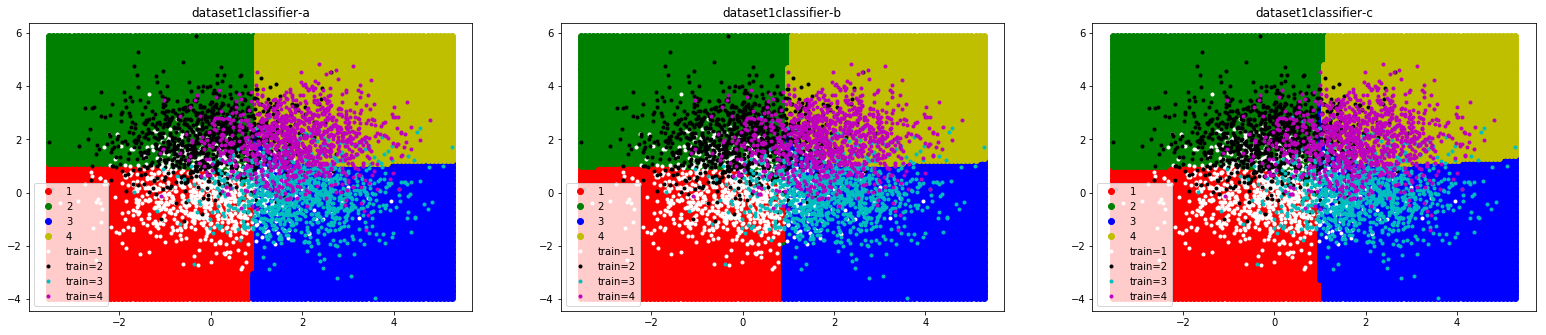

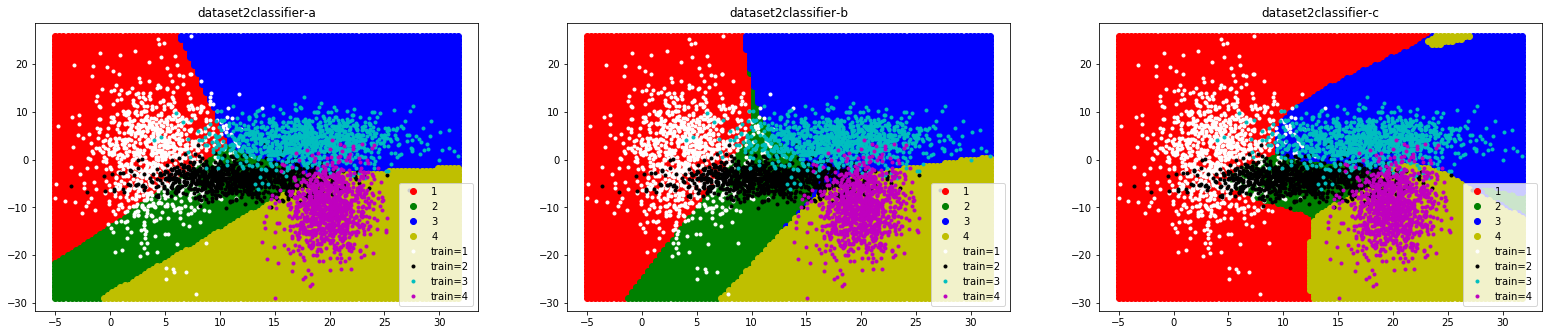

In [10]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
X_train1 = np.load('./Archive/dataset2_1.npz_FILES/arr_0.npy')
Y_train1 = np.load('./Archive/dataset2_1.npz_FILES/arr_1.npy')
X_test1  = np.load('./Archive/dataset2_1.npz_FILES/arr_2.npy')
Y_test1  = np.load('./Archive/dataset2_1.npz_FILES/arr_3.npy')
X_train2 = np.load('./Archive/dataset2_2.npz_FILES/arr_0.npy')
Y_train2 = np.load('./Archive/dataset2_2.npz_FILES/arr_1.npy')
X_test2  = np.load('./Archive/dataset2_2.npz_FILES/arr_2.npy')
Y_test2  = np.load('./Archive/dataset2_2.npz_FILES/arr_3.npy')

Y_pred_test_1a_1 = Bayes2a(X_train1, Y_train1, X_test1)
Y_pred_test_1b_1 = Bayes2b(X_train1, Y_train1, X_test1)
Y_pred_test_1c_1 = Bayes2c(X_train1, Y_train1, X_test1)

Y_pred_test_1a_2 = Bayes2a(X_train2, Y_train2, X_test2)
Y_pred_test_1b_2 = Bayes2b(X_train2, Y_train2, X_test2)
Y_pred_test_1c_2 = Bayes2c(X_train2, Y_train2, X_test2)

error = np.ndarray(shape=(2,3))
error[0][0] = len(np.where(Y_pred_test_1a_1 != Y_test1)[0])/(len(Y_test1))
error[0][1] = len(np.where(Y_pred_test_1b_1 != Y_test1)[0])/(len(Y_test1))
error[0][2] = len(np.where(Y_pred_test_1c_1 != Y_test1)[0])/(len(Y_test1))
error[1][0] = len(np.where(Y_pred_test_1a_2 != Y_test2)[0])/(len(Y_test2))
error[1][1] = len(np.where(Y_pred_test_1b_2 != Y_test2)[0])/(len(Y_test2))
error[1][2] = len(np.where(Y_pred_test_1c_2 != Y_test2)[0])/(len(Y_test2))
# print(error)
L = np.matrix([[0,1,2,3], [1,0,1,2],[2,1,0,1],[3,2,1,0]])
def mat(Y_test,Y_pred_test):
    m = np.ndarray(shape=(4,4))
    for i in range(4):
        for j in range(4):
            m[i][j] = len(np.where(Y_pred_test.T[np.where(Y_test==i+1)[0]] == np.array([j+1]))[0])
    return m
# print(mat(Y_test1,Y_pred_test_1a_1))
# print(mat(Y_test1,Y_pred_test_1b_1))
# print(mat(Y_test1,Y_pred_test_1c_1))
# print(mat(Y_test2,Y_pred_test_1a_2))
# print(mat(Y_test2,Y_pred_test_1b_2))
# print(mat(Y_test2,Y_pred_test_1c_2))

expectedloss = np.ndarray(shape=(2,3))
expectedloss[0][0] = np.sum(np.multiply(mat(Y_test1,Y_pred_test_1a_1),L))/(len(Y_test1))
expectedloss[0][1] = np.sum(np.multiply(mat(Y_test1,Y_pred_test_1b_1),L))/(len(Y_test1))
expectedloss[0][2] = np.sum(np.multiply(mat(Y_test1,Y_pred_test_1c_1),L))/(len(Y_test1))
expectedloss[1][0] = np.sum(np.multiply(mat(Y_test2,Y_pred_test_1a_2),L))/(len(Y_test2))
expectedloss[1][1] = np.sum(np.multiply(mat(Y_test2,Y_pred_test_1b_2),L))/(len(Y_test2))
expectedloss[1][2] = np.sum(np.multiply(mat(Y_test2,Y_pred_test_1c_2),L))/(len(Y_test2))
# print(expectedloss)

def fun(x,z,i,cl):
    plt.plot(x[np.where(z.T==1)[0]].T[0],x[np.where(z.T==1)[0]].T[1], 'ro')
    plt.plot(x[np.where(z.T==2)[0]].T[0],x[np.where(z.T==2)[0]].T[1], 'go')
    plt.plot(x[np.where(z.T==3)[0]].T[0],x[np.where(z.T==3)[0]].T[1], 'bo')
    plt.plot(x[np.where(z.T==4)[0]].T[0],x[np.where(z.T==4)[0]].T[1], 'yo')
    if(i==1):
        plt.plot(X_train1[Y_train1==1].T[0],X_train1[Y_train1==1].T[1], 'w.')
        plt.plot(X_train1[Y_train1==2].T[0],X_train1[Y_train1==2].T[1], 'k.')
        plt.plot(X_train1[Y_train1==3].T[0],X_train1[Y_train1==3].T[1], 'c.')
        plt.plot(X_train1[Y_train1==4].T[0],X_train1[Y_train1==4].T[1], 'm.')
        plt.title('dataset1' + 'classifier-{}'.format(cl))
    elif(i==2):
        plt.plot(X_train2[Y_train2==1].T[0],X_train2[Y_train2==1].T[1], 'w.')
        plt.plot(X_train2[Y_train2==2].T[0],X_train2[Y_train2==2].T[1], 'k.')
        plt.plot(X_train2[Y_train2==3].T[0],X_train2[Y_train2==3].T[1], 'c.')
        plt.plot(X_train2[Y_train2==4].T[0],X_train2[Y_train2==4].T[1], 'm.')
        plt.title('dataset2' + 'classifier-{}'.format(cl))
    plt.legend(('1','2','3','4','train=1','train=2','train=3','train=4'))


x1 = np.linspace(np.min(X_train1.T[0]),np.max(X_train1.T[0]),100)
x2 = np.linspace(np.min(X_train1.T[1]),np.max(X_train1.T[1]),100)
x1,x2 = np.meshgrid(x1,x2)
x1 = x1.reshape((100*100,1))
x2 = x2.reshape((100*100,1))
x = np.concatenate((x1,x2),axis=1)
z1 = Bayes2a(X_train1,Y_train1,x)
z2 = Bayes2b(X_train1,Y_train1,x)
z3 = Bayes2c(X_train1,Y_train1,x)
plt.figure(figsize = (27,18))
plt.subplot(3,3,1)
fun(x,z1,1,'a')
plt.subplot(3,3,2)
fun(x,z2,1,'b')
plt.subplot(3,3,3)
fun(x,z3,1,'c') 

x1 = np.linspace(np.min(X_train2.T[0]),np.max(X_train2.T[0]),100)
x2 = np.linspace(np.min(X_train2.T[1]),np.max(X_train2.T[1]),100)
x1,x2 = np.meshgrid(x1,x2)
x1 = x1.reshape((100*100,1))
x2 = x2.reshape((100*100,1))
x = np.concatenate((x1,x2),axis=1)
z1 = Bayes2a(X_train2,Y_train2,x)
z2 = Bayes2b(X_train2,Y_train2,x)
z3 = Bayes2c(X_train2,Y_train2,x)
plt.figure(figsize = (27,18))
plt.subplot(3,3,4)
fun(x,z1,2,'a')
plt.subplot(3,3,5)
fun(x,z2,2,'b')
plt.subplot(3,3,6)
fun(x,z3,2,'c')



# ** Cell type : TextWrite ** 
(Write your observations and table of errors here)
### Confusion Matrices

| trainset1\classifier a | 1   | 2   | 3   |  4  | trainset1\classifier b | 1  | 2   | 3   | 4   | trainset1\classifier c | 1   | 2   | 3   | 4   |
|---------------------|-----|-----|-----|-----|---------------------|-----|-----|-----|-----|---------------------|-----|-----|-----|-----|
| 1                   | 633 | 219 | 136 | 12  | 1                   | 633 | 218 | 137 | 12  | 1                   | 634 | 217 | 138 | 11  |
| 2                   | 97  | 738 | 62  | 103 | 2                   | 95  | 743 | 60  | 102 | 2                   | 99  | 742 | 61  | 98  |
| 3                   | 86  | 49  | 770 | 95  | 3                   | 84  | 49  | 773 | 94  | 3                   | 87  | 47  | 772 | 94  |
| 4                   | 15  | 136 | 194 | 655 | 4                   | 16  | 137 | 196 | 651 | 4                   | 15  | 134 | 201 | 650 |

| trainset2\classifier a| 1   | 2   | 3   | 4   | trainset2\classifier b| 1  | 2  | 3   | 4   | trainset2\classifier c| 1   | 2  | 3   | 4   |
|---------------------|-----|-----|-----|-----|---------------------|-----|-----|-----|-----|---------------------|-----|-----|-----|-----|
| 1                   | 830 | 150 | 18  | 2   | 1                   | 891 | 106 | 3   | 0   | 1                   | 901 | 80  | 19  | 0   |
| 2                   | 93  | 784 | 46  | 77  | 2                   | 119 | 691 | 124 | 66  | 2                   | 64  | 824 | 46  | 66  |
| 3                   | 30  | 61  | 905 | 4   | 3                   | 23  | 106 | 864 | 7   | 3                   | 19  | 31  | 936 | 14  |
| 4                   | 0   | 23  | 78  | 899 | 4                   | 0   | 5   | 102 | 893 | 4                   | 0   | 36  | 48  | 916 |

### Expected loss
  
| dataset\classifier | a       | b      | c       |
|--------------------|---------|--------|---------|
| 1                  | 0.42975 | 0.429  | 0.42775 |
| 2                  | 0.1835  | 0.1895 | 0.14075 |

### Observations
* classes 1 and 4 are not confused much since the associated loss is high.
* classifier a,b does linearly separation of 2d region. classfier c does non linear separation.

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Repeat for 100 times, and estimate the bias and variance for all 30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms (corresponding to 5 degrees and 6 lambda values) analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. 

3b) In the next text cell, give the Bias and Variance computed as a $5\times 6$ matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




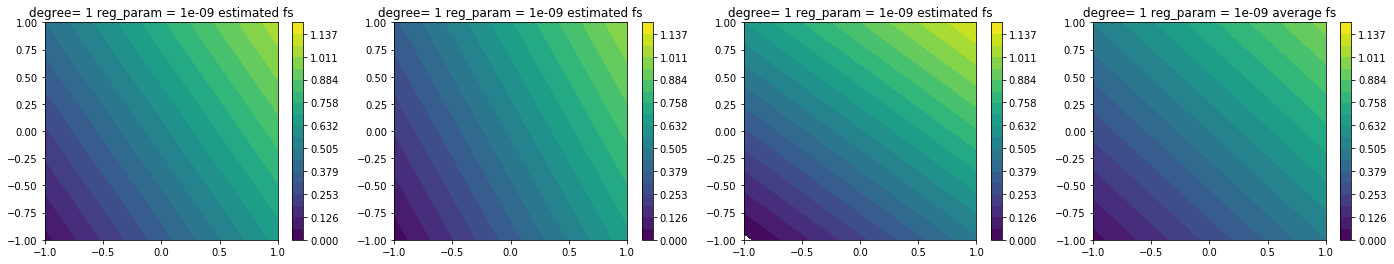

Degree= 1 lambda= 1e-09
Bias = 0.05355902256572373
Variance = 0.003533525600965935
MSE = 0.05709254816668966


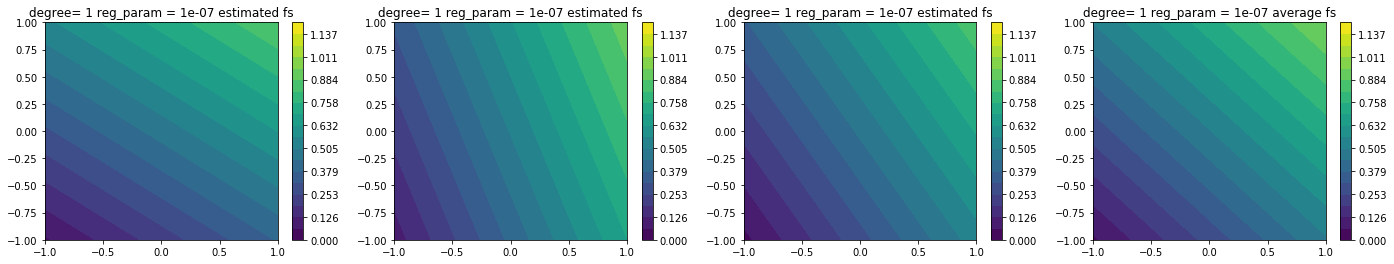

Degree= 1 lambda= 1e-07
Bias = 0.05526511880011795
Variance = 0.0036499343464072996
MSE = 0.05891505314652525


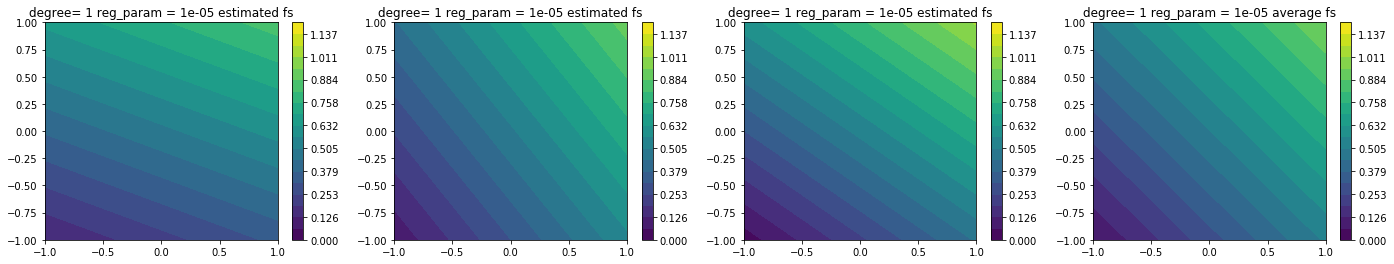

Degree= 1 lambda= 1e-05
Bias = 0.05453442320021005
Variance = 0.0036167480722211357
MSE = 0.05815117127243118


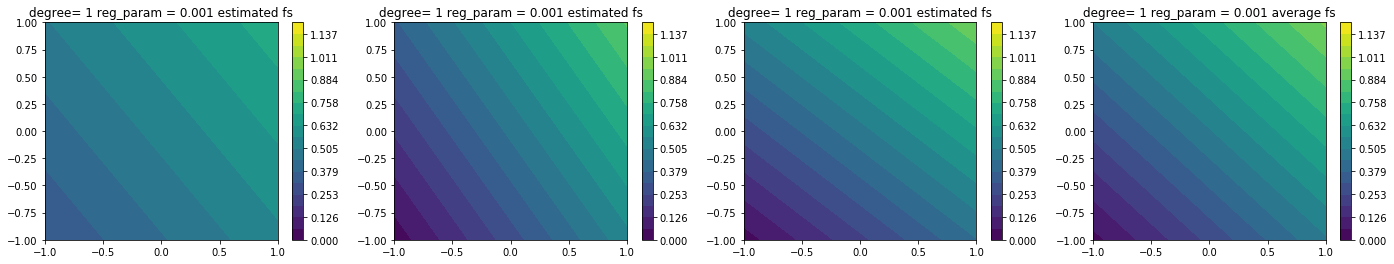

Degree= 1 lambda= 0.001
Bias = 0.05410754091963995
Variance = 0.0035352416410673617
MSE = 0.05764278256070731


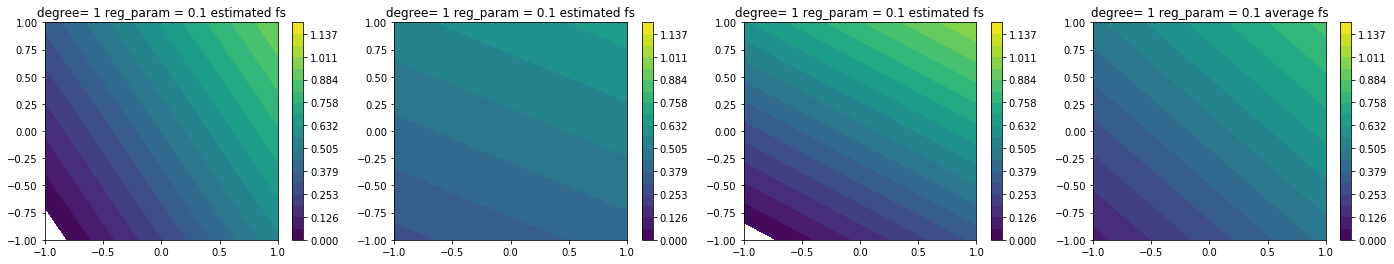

Degree= 1 lambda= 0.1
Bias = 0.05731714422066002
Variance = 0.0026889347331066032
MSE = 0.06000607895376662


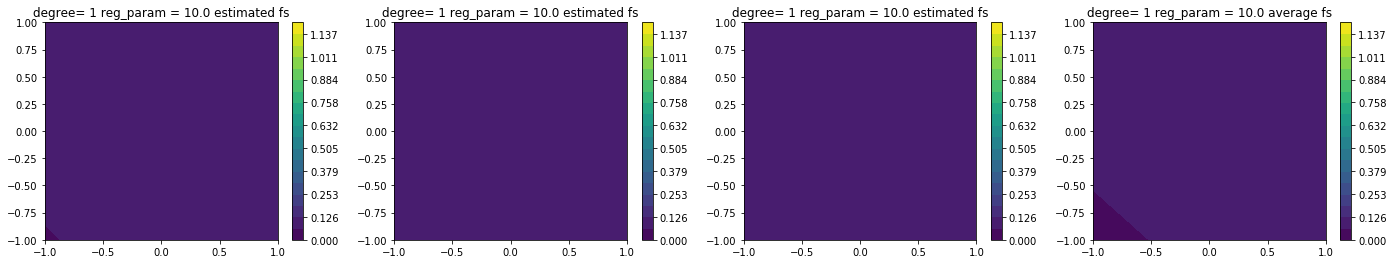

Degree= 1 lambda= 10.0
Bias = 0.25471577135384676
Variance = 7.730093689845095e-05
MSE = 0.2547930722907452


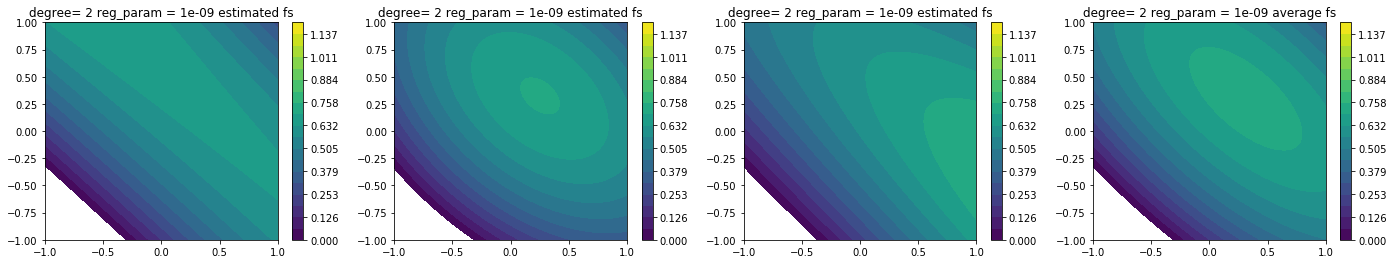

Degree= 2 lambda= 1e-09
Bias = 0.03359595573160733
Variance = 0.006122590205602155
MSE = 0.039718545937209485


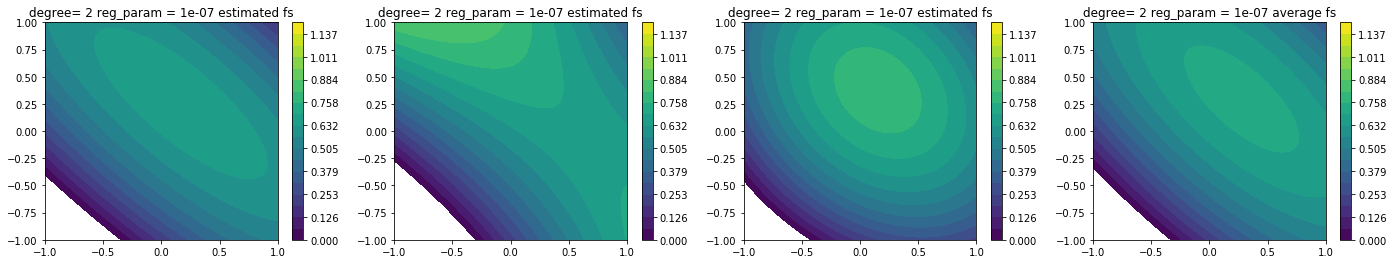

Degree= 2 lambda= 1e-07
Bias = 0.03418844097853494
Variance = 0.005768152255090104
MSE = 0.03995659323362505


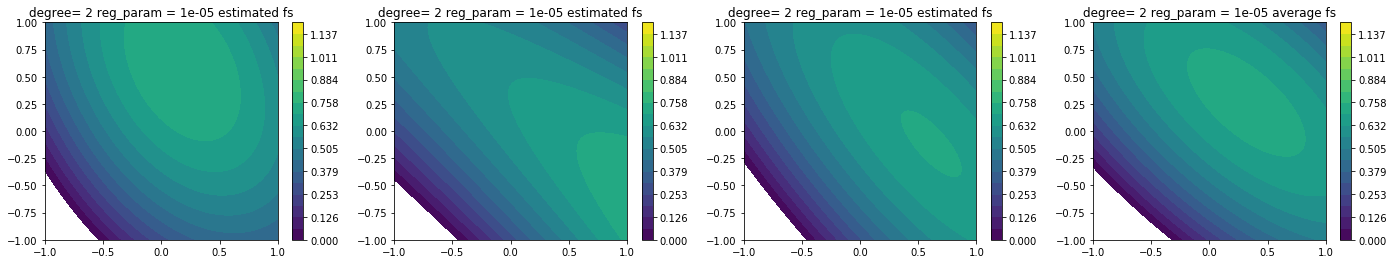

Degree= 2 lambda= 1e-05
Bias = 0.033882073360915047
Variance = 0.005711284216237524
MSE = 0.03959335757715257


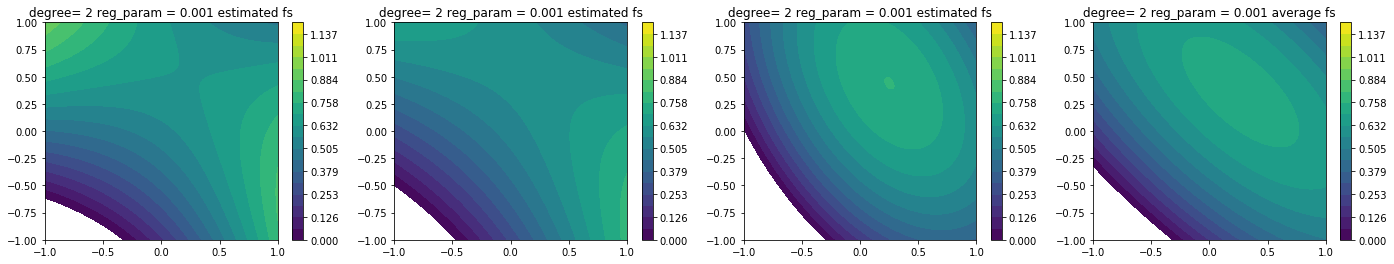

Degree= 2 lambda= 0.001
Bias = 0.03386034444807494
Variance = 0.004890173142804319
MSE = 0.03875051759087926


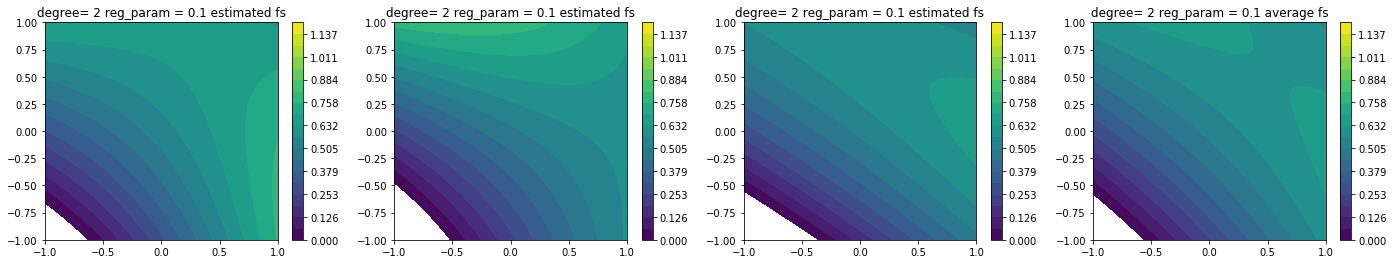

Degree= 2 lambda= 0.1
Bias = 0.04076024965462174
Variance = 0.003409249528947762
MSE = 0.0441694991835695


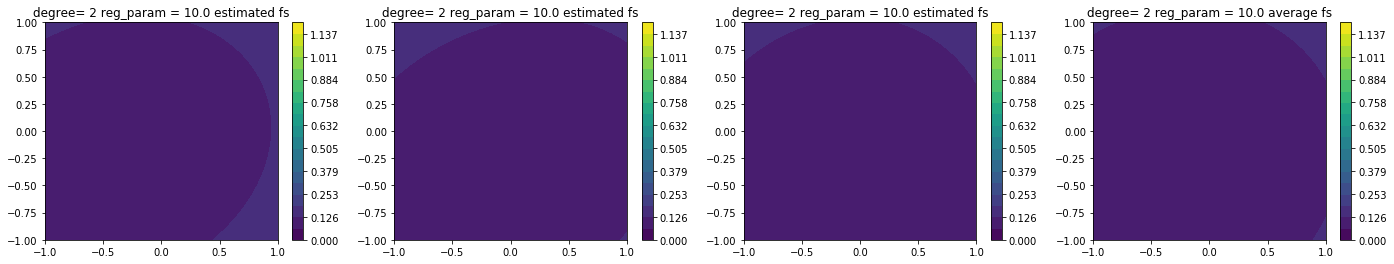

Degree= 2 lambda= 10.0
Bias = 0.24465487225188967
Variance = 8.06665687768431e-05
MSE = 0.2447355388206665


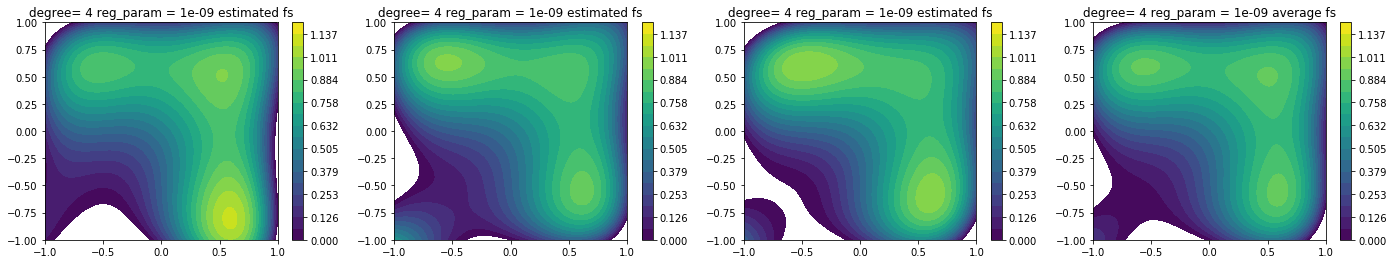

Degree= 4 lambda= 1e-09
Bias = 0.0069356390093021905
Variance = 0.007406756779939581
MSE = 0.014342395789241772


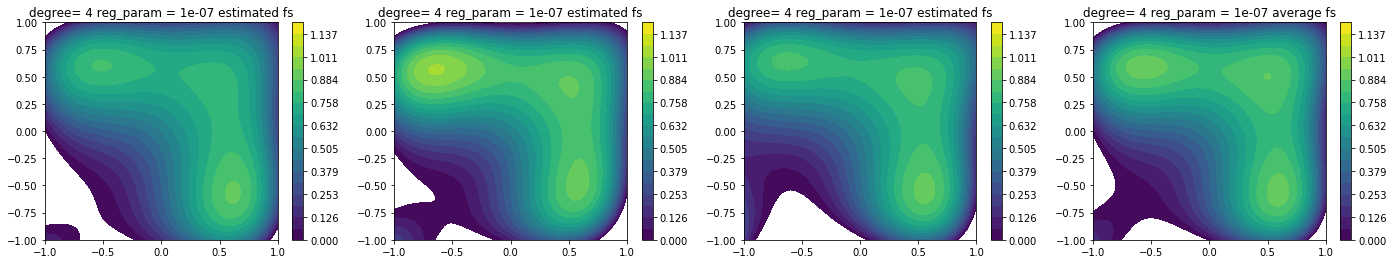

Degree= 4 lambda= 1e-07
Bias = 0.007055828868029321
Variance = 0.008202739309988643
MSE = 0.015258568178017965


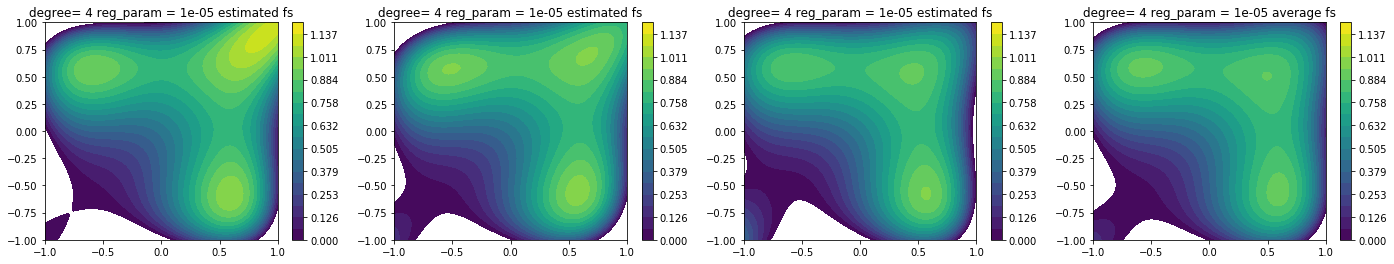

Degree= 4 lambda= 1e-05
Bias = 0.007140410064362173
Variance = 0.009278779355929117
MSE = 0.01641918942029129


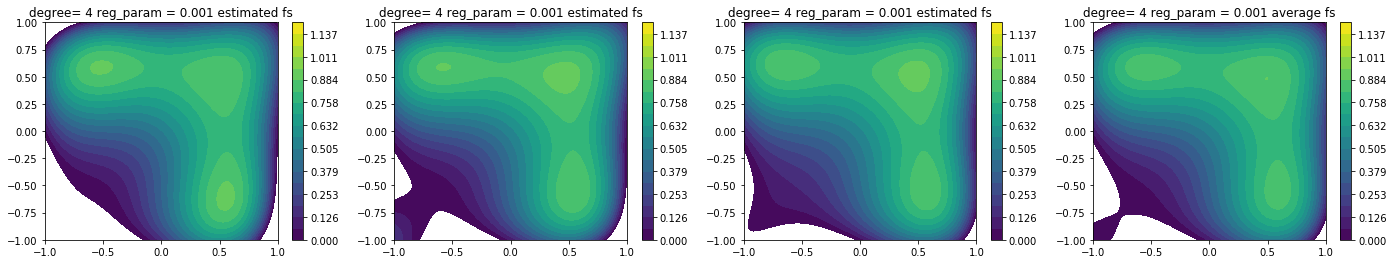

Degree= 4 lambda= 0.001
Bias = 0.006615046538039661
Variance = 0.004515204925596376
MSE = 0.011130251463636037


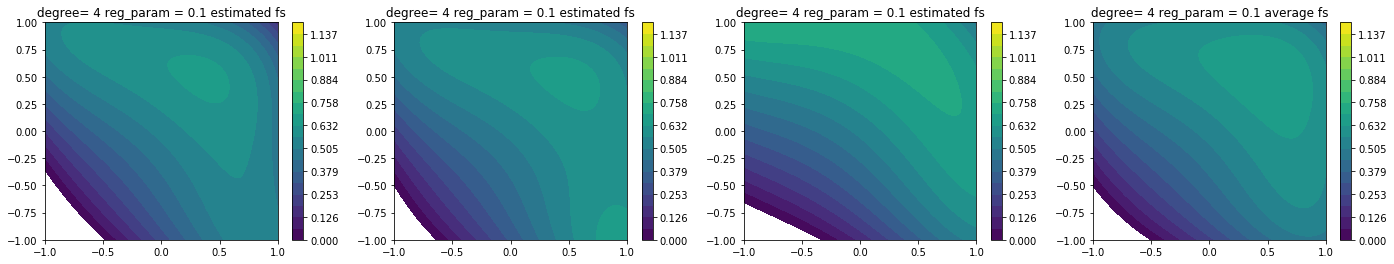

Degree= 4 lambda= 0.1
Bias = 0.03504344950290067
Variance = 0.0034637766710531146
MSE = 0.03850722617395379


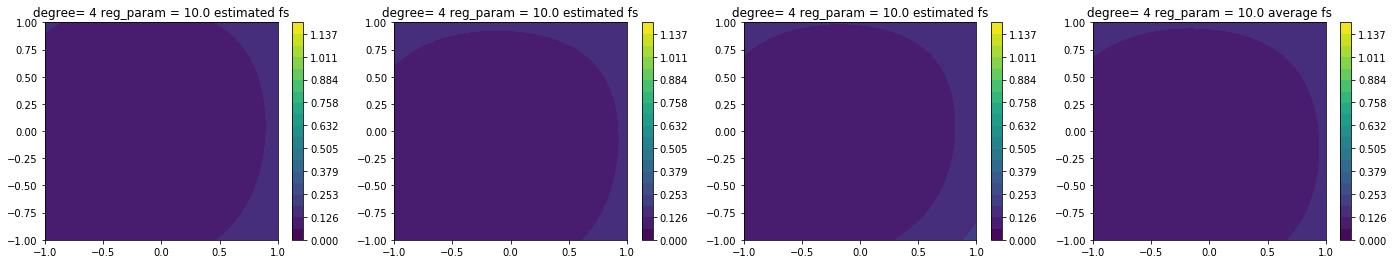

Degree= 4 lambda= 10.0
Bias = 0.24797504979635668
Variance = 9.46301776866303e-05
MSE = 0.2480696799740433


KeyboardInterrupt: 

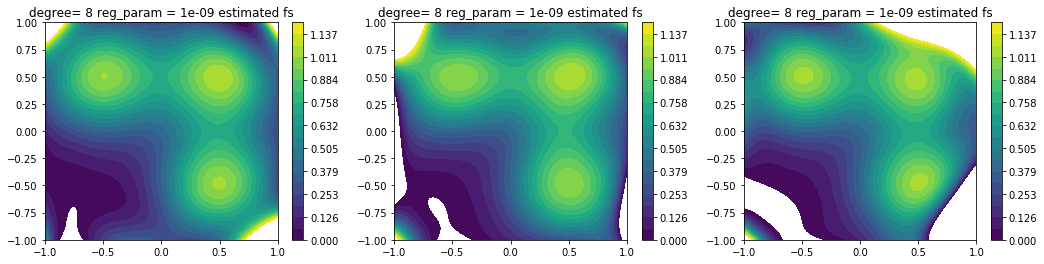

In [11]:
# Cell type : CodeWrite
def mapping(X,degree):
    num_training_samples = len(X)
    phi = np.ones(num_training_samples)
    for j in range(1,degree+1):
        for k in range(0,j+1):
            phi = np.vstack((phi,np.transpose(X)[0]**k*np.transpose(X)[1]**(j-k)))

    phi = phi.T
    return phi
    
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    phi = mapping(X_test,degree)
    Y_test_pred = np.dot(phi,wt_vector)
    return Y_test_pred

    
    
def visualise_polynomial_2d(wt_vector, degree,reg_param, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X1 = X.reshape((100*100,1))
    Y1 = Y.reshape((100*100,1))
    X_test = np.concatenate((X1,Y1),axis=1)
    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    Z = Z.reshape((100,100))
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title('degree= '+ str(degree) +' reg_param = '+ str(reg_param)+' '+ title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi = mapping(X_train,degree)
    temp = np.dot(phi.T,phi)
    w = np.dot((np.linalg.inv((temp+(len(Y_train)*reg_param*0.5)*(np.identity(len(temp)))))),np.dot(phi.T,Y_train)) 
    return w
    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    bias = 0
    variance = 0
    mse = 0
    avg_w = np.zeros(())
    X_test = np.random.rand(10000,2)*2-1
    Y_test = (np.exp(-4*np.sum(np.abs(X_test-([0.5,0.5]))**2,axis=-1))+
               np.exp(-4*np.sum(np.abs(X_test-([-0.5,0.5]))**2,axis=-1))+
               np.exp(-4*np.sum(np.abs(X_test-([0.5,-0.5]))**2,axis=-1)))
    Y_test_samples = np.ndarray(shape=(100,10000))
    plt.figure(figsize = ( 24, 4 ) )
    for i in range(100):
        X_train = np.random.rand(num_training_samples,2)*2-1
        Y_train = (np.exp(-4*np.sum(np.abs(X_train-([0.5,0.5]))**2,axis=-1))+
                   np.exp(-4*np.sum(np.abs(X_train-([-0.5,0.5]))**2,axis=-1))+
                   np.exp(-4*np.sum(np.abs(X_train-([0.5,-0.5]))**2,axis=-1)))
        w = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        
        
        if(i<3):
            plt.subplot( 1, 4, i + 1 )
            visualise_polynomial_2d(w,degree,reg_param,'estimated fs')
        Y_test_samples[i] = polynomial_regression_ridge_pred(X_test, w, degree)
        avg_w = avg_w + w
    avg_w = avg_w/100
    plt.subplot( 1, 4, 4 )
    visualise_polynomial_2d(avg_w,degree,reg_param,'average fs')
    
    plt.show()
    Y_test_pred_avg = polynomial_regression_ridge_pred(X_test, avg_w, degree)
    bias  = np.sum((Y_test-Y_test_pred_avg)**2)/(10000)
    variance = np.sum((Y_test_samples-Y_test_pred_avg)**2)/(1e4*1e2)
    mse  = bias + variance
    return bias,variance,mse
    
# m = 10000
# deg = 0
# reg = 0
for degree in [1,2,4,8,16]:
    for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e)) 
#         if(m>e):
#             m = e
#             deg = degree
#             reg = reg_param
# print(deg)
# print(reg)

In [ ]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.
### Bias table
| degree\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     |
|------------------|---------|---------|---------|---------|---------|---------|
| 1                | 0.0535  | 0.0542  | 0.055   | 0.0540  | 0.0538  | 0.2576  |
| 2                | 0.034   | 0.0340  | 0.0340  | 0.0337  | 0.0415  | 0.2466  |
| 4                | 0.00717 | 0.00687 | 0.0072  | 0.00637 | 0.03429 | 0.23939 |
| 8                | 0.0166  | 0.0166  | 0.0033  | 0.0077  | 0.0292  | 0.2419  |
| 16               | 0.0295  | 0.0096  | 0.00545 | 0.00928 | 0.0269  | 0.24957 |

### Variance table

| degree\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     |
|------------------|---------|---------|---------|---------|---------|---------|
| 1                | 0.00356 | 0.00388 | 0.00371 | 0.00311 | 0.00333 | 7e-05   |
| 2                | 0.00528 | 0.00445 | 0.0059  | 0.00542 | 0.00307 | 9e-05   |
| 4                | 0.00825 | 0.01227 | 0.00771 | 0.00508 | 0.00372 | 0.00012 |
| 8                | 0.49231 | 0.04831 | 0.02184 | 0.01074 | 0.0032  | 0.00013 |
| 16               | 0.4277  | 0.17802 | 0.06779 | 0.01624 | 0.00361 | 0.00015 |

### Conclusion
*  As degree increases bias is decreasing. As degree increases variance is increasing.
* increasing $\lambda$ variance is decreasing.
* Degree= 4 $\lambda$= 0.001 gives best fit for data with mean square error = 0.011.

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using three different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter. 

In the next codewrite cell, for each training set size compute how the train and test squared error varies with degree (by changing $\phi$) and regularisation parameter (changing $\lambda$). Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title including the hyperparameters. Total number of figures = 4 (one for each training set size.)

Summarise your findings in the next tex cell in a few sentences. And reproduce the tables showing train and test error for various training sizes, with appropriate row and column names.




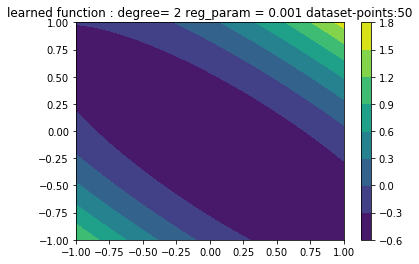

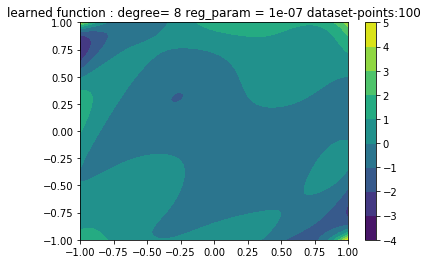

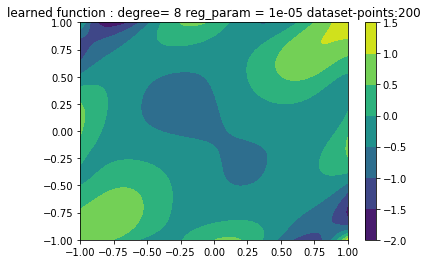

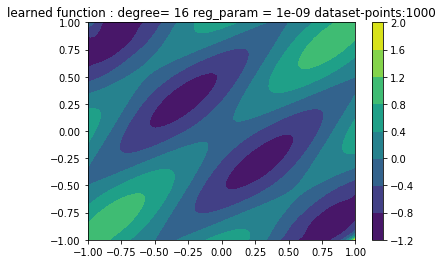

In [12]:
# Cell type : CodeWrite 
X_traindata = np.load('./Archive/dataset4_1.npz_FILES/arr_0.npy')
Y_traindata = np.load('./Archive/dataset4_1.npz_FILES/arr_1.npy')
X_testdata  = np.load('./Archive/dataset4_1.npz_FILES/arr_2.npy')
Y_testdata  = np.load('./Archive/dataset4_1.npz_FILES/arr_3.npy')

def mapping(X,degree):
    num_training_samples = len(X)
    phi = np.ones(num_training_samples)
    for j in range(1,degree+1):
        for k in range(0,j+1):
            phi = np.vstack((phi,np.transpose(X)[0]**k*np.transpose(X)[1]**(j-k)))

    phi = phi.T
    return phi
    
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    phi = mapping(X_test,degree)
    Y_test_pred = np.dot(phi,wt_vector)
    return Y_test_pred
    
def visualise_polynomial_2d(wt_vector, degree, title,reg_param):
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X1 = X.reshape((100*100,1))
    Y1 = Y.reshape((100*100,1))
    X_test = np.concatenate((X1,Y1),axis=1)
    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    Z = Z.reshape((100,100))
    plt.figure()
    plt.contourf(X,Y,Z)
    plt.title('learned function : degree= '+ str(degree) + ' reg_param = '+ str(reg_param)+ ' '+ title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    phi = mapping(X_train,degree)
    temp = np.dot(phi.T,phi)
    w = (np.matmul((np.linalg.inv((temp+(len(Y_train)*reg_param*0.5)*(np.identity(len(temp)))))),
                   np.matmul(phi.T,Y_train))) 
    return w
    
def compute_BV_error_sample_plot(degree, reg_param,num_samples):
    X_train = X_traindata[0:num_samples]
    Y_train = Y_traindata[0:num_samples]
    w = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
    Y_train_sample = polynomial_regression_ridge_pred(X_train, w, degree)
    Y_test_pred = polynomial_regression_ridge_pred(X_testdata, w, degree)
    trainerror = np.sum((Y_train_sample-Y_train)**2)/(num_samples)
    testerror = np.sum((Y_test_pred-Y_testdata)**2)/(len(Y_testdata))
#     print('degree:{}'.format(degree))
#     print('reg_param:{}'.format(reg_param))
#     print('error:{}'.format(testerror))
    return w,testerror
    
for num_samples in [50,100,200,1000]:
    error = 10000
    deg  = 0
    reg = 0
    w = np.zeros(())
    for degree in [1,2,4,8,16]:
        for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            wt_vector, testerror = compute_BV_error_sample_plot(degree, reg_param,num_samples)
            if(error>testerror):
                deg = degree
                reg = reg_param
                error = testerror
                w = wt_vector
                
    visualise_polynomial_2d(w, deg,'dataset-points:{}'.format(num_samples),reg)
#     print('for dataset-points:{}'.format(num_samples))
#     print('degree:{}'.format(deg))
#     print('reg_param:{}'.format(reg))
#     print('error:{}'.format(error))
    


### datasize 50

| Trainerror degreee\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     | Testerror degree\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     |
|------------------------------|---------|---------|---------|---------|---------|---------|------------------------|---------|---------|---------|---------|---------|---------|
| 1                            | 0.2477  | 0.2477  | 0.2477  | 0.2477  | 0.24821 | 0.30921 | 1                      | 0.28513 | 0.28513 | 0.28513 | 0.28502 | 0.2764  | 0.255   |
| 2                            | 0.13875 | 0.13875 | 0.13875 | 0.13876 | 0.15921 | 0.30577 | 2                      | 0.15181 | 0.15181 | 0.1518  | 0.1513  | 0.15727 | 0.2514  |
| 4                            | 0.10216 | 0.10216 | 0.10216 | 0.10314 | 0.14021 | 0.3016  | 4                      | 0.18486 | 0.18486 | 0.1847  | 0.1835  | 0.1589  | 0.24895 |
| 8                            | 0.00027 | 0.00104 | 0.1985  | 0.05911 | 0.13456 | 0.29609 | 8                      | 833.694 | 97.918  | 13.628  | 0.73866 | 0.1669  | 0.2462  |
| 16                           | 1e-5    | 0.00035 | 0.01058 | 0.05092 | 0.13128 | 0.29132 | 16                     | 519.299 | 115.06  | 7.711   | 0.95    | 0.17221 | 0.2441  |

### datasize 100

| Trainerror degreee\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     | Testerror degree\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     |
|------------------------------|---------|---------|---------|---------|---------|---------|------------------------|---------|---------|---------|---------|---------|---------|
| 1                            | 0.2629  | 0.2629  | 0.2629  | 0.2629  | 0.26303 | 0.2922  | 1                      | 0.2548  | 0.2548  | 0.2548  | 0.2548  | 0.25317 | 0.2569  |
| 2                            | 0.13483 | 0.13483 | 0.13483 | 0.13484 | 0.15321 | 0.28765 | 2                      | 0.14408 | 0.14408 | 0.14407 | 0.14368 | 0.14455 | 0.25271 |
| 4                            | 0.10205 | 0.10205 | 0.10205 | 0.10258 | 0.13957 | 0.28309 | 4                      | 0.16949 | 0.16949 | 0.16939 | 0.16215 | 0.14277 | 0.24959 |
| 8                            | 0.0179  | 0.01792 | 0.02964 | 0.07068 | 0.13307 | 0.27709 | 8                      | 0.13893 | 0.1318  | 0.31045 | 0.2106  | 0.1465  | 0.24581 |
| 16                           | 5e-5    | 0.00176 | 0.02095 | 0.06017 | 0.12944 | 0.27163 | 16                     | 5.988   | 5.909   | 0.3566  | 0.250   | 0.1524  | 0.24276 |

### datasize 200
| Trainerror degreee\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     | Testerror degree\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     |
|------------------------------|---------|---------|---------|---------|---------|---------|------------------------|---------|---------|---------|---------|---------|---------|
| 1                            | 0.25743 | 0.25743 | 0.25743 | 0.25743 | 0.25748 | 0.26978 | 1                      | 0.24874 | 0.24874 | 0.24874 | 0.24874 | 0.24862 | 0.25922 |
| 2                            | 0.13026 | 0.13026 | 0.13026 | 0.13026 | 0.14666 | 0.26544 | 2                      | 0.13118 | 0.13118 | 0.13118 | 0.13106 | 0.14122 | 0.25497 |
| 4                            | 0.10251 | 0.10251 | 0.10251 | 0.10282 | 0.13434 | 0.26193 | 4                      | 0.13301 | 0.13301 | 0.13298 | 0.13101 | 0.13574 | 0.25192 |
| 8                            | 0.02123 | 0.02124 | 0.0344  | 0.08867 | 0.12726 | 0.25778 | 8                      | 0.06055 | 0.05926 | 0.04886 | 0.1066  | 0.13612 | 0.24847 |
| 16                           | 0.00011 | 0.00256 | 0.02588 | 0.07133 | 0.12498 | 0.25451 | 16                     | 0.09621 | 0.23517 | 0.10176 | 0.09095 | 0.13851 | 0.2459  |

### datasize 1000
| Trainerror degreee\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     | Testerror degree\reg_param | 1e-9    | 1e-7    | 1e-5    | 1e-3    | 1e-1    | 1e1     |
|------------------------------|---------|---------|---------|---------|---------|---------|------------------------|---------|---------|---------|---------|---------|---------|
| 1                            | 0.23937 | 0.23937 | 0.23937 | 0.23937 | 0.2394  | 0.24862 | 1                      | 0.24833 | 0.24833 | 0.24833 | 0.24833 | 0.24847 | 0.25973 |
| 2                            | 0.12185 | 0.12185 | 0.12185 | 0.12185 | 0.13629 | 0.24463 | 2                      | 0.12781 | 0.12781 | 0.12781 | 0.12781 | 0.14267 | 0.25563 |
| 4                            | 0.11051 | 0.11051 | 0.11051 | 0.1107  | 0.12828 | 0.2416  | 4                      | 0.11869 | 0.11869 | 0.1187  | 0.11912 | 0.13661 | 0.25264 |
| 8                            | 0.02791 | 0.02791 | 0.03811 | 0.09137 | 0.12564 | 0.23801 | 8                      | 0.03897 | 0.03871 | 0.04254 | 0.09869 | 0.13584 | 0.2492  |
| 16                           | 0.0002  | 0.00335 | 0.02704 | 0.07725 | 0.1246  | 0.23522 | 16                     | 0.00086 | 0.00552 | 0.03179 | 0.08443 | 0.13583 | 0.24658 |

### Observations
* As datapoints increases , increasing degree is good fit as higher degree on less datapoints have high variance which increases mean square error.
* Train error decreases with degree increasing . Train error increases with  $\lambda$ increasing.